In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
quote = Quote(screen_funds('Bonds') + ['AGG', 'BND', 'BNDX', 'BIV', 'SCHZ'], 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

from 2019-05-20 to 2019-07-08 - 77


In [3]:
stats = quote.statistics()
stats = stats[(stats['shrp'] > 0.2) & (stats['std'] > 0.1)]
print(len(stats))
stats

62


,len,mean,std,shrp,drawdown
Symbols,,,,,
BNDX,29,0.469876,0.222838,1.930524,0.193599
EMLC,29,1.207340,0.724286,1.612148,0.374211
IGIB,29,0.603119,0.388246,1.451236,0.648325
VCIT,29,0.613206,0.410302,1.397808,0.699997
USIG,29,0.624862,0.423511,1.381734,0.716407
VWOB,29,0.767961,0.537842,1.354077,0.695306
VCLT,29,1.163333,0.838541,1.340007,1.490251
LQD,29,0.809709,0.577248,1.333962,1.000560
SPIB,29,0.419415,0.293421,1.294154,0.586557


evicted PZA 0.8238371533798255
evicted ITM 0.8710955213836751
evicted IBDL 0.8578765921769663
evicted HYLS 0.86545949592419
evicted BSJK 0.8788224283955175
evicted CMF 0.8307396568647463
evicted TIP 0.8965610216067667
evicted LMBS 0.7527855684460353
evicted HYLB 0.8635791278160077
evicted BSCK 0.6851783155663397
evicted BLV 0.8674639840071391
evicted TFI 0.672206080947759
evicted VCLT 0.875469845164185
evicted IGIB 0.6428570981019626
evicted BWX 0.6177269090806871
evicted SPTL 0.6849455979878799
evicted VWOB 0.7651583028814558
evicted SUB 0.4908663607240461
retry backlogs ['VMBS', 'SPIB', 'IEI', 'IEF', 'MBB', 'VTEB', 'SJNK', 'BSV', 'MUB', 'VTIP', 'STIP', 'VGIT', 'SCHO', 'SCHR', 'BND', 'ISTB', 'TDTT', 'VCSH', 'IPE', 'VGSH', 'SLQD', 'SPTS', 'HYS', 'SHYG', 'JNK', 'USIG', 'SHY', 'SPSB', 'TLT', 'SCHP', 'AGG', 'BIV', 'GOVT', 'IGSB', 'HYG', 'SCHZ', 'LQD', 'EMB', 'VCIT'] at 0.905 - 2.629
evicted MBB 0.8928049563210854
evicted HYS 0.8910492620333516
evicted SCHP 0.8703574349928561
evicted VTEB 

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,29.0,0.404838,0.143094,0.127789,0.309136,0.398470,0.515062,0.711510,2.551855,0.177435
BNDX,29.0,0.469876,0.222838,0.000000,0.299674,0.535239,0.638090,0.830923,1.930524,0.193599
EMLC,29.0,1.207340,0.724286,0.260488,0.583431,1.041045,1.719975,2.768686,1.612148,0.374211
HYD,29.0,0.182374,0.173675,-0.330397,0.103829,0.205334,0.267248,0.562295,0.821599,0.409065
NUV,29.0,0.401862,0.696499,-0.785085,-0.098234,0.493585,0.992067,1.500000,0.520000,0.982322
CWB,29.0,0.697689,1.275168,-1.777424,-0.321604,0.989422,1.484486,3.391522,0.516015,2.436365


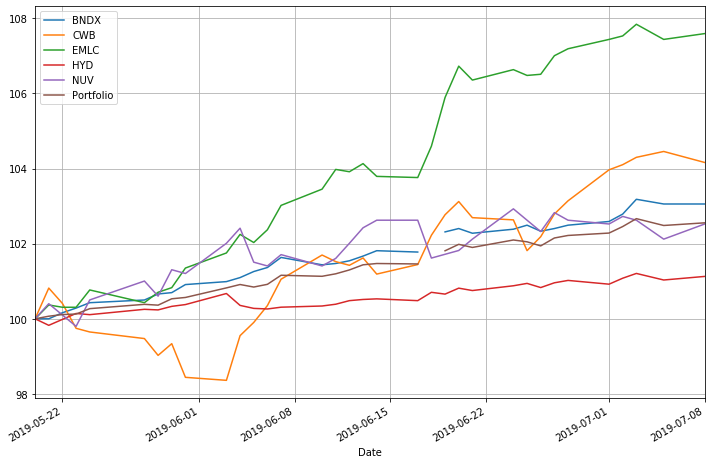

In [9]:
quote.setup_mask(stats.index)
ratio, shrp = quote.optimize_portfolio(.02)
print(ratio, shrp)
quote.setup_mask(ratio)
quote.graph(ratio)